In [13]:
# ez most tökéletesen működik 2024.05.10. 19:37
# új módon, importált TZ függvényekkel

###Tedd elérhetővé a "EFC_versenyadatok.xlsx" alapadatokat
Ha Google Colabban futtatod, töltsd fel és csomagoltasd ki a "Flyball_input.zip" fájlt. Ha nem abban, lépd át ezeket a cellákat.

In [14]:
######### 240502 ######## Google Colab-ba fájlok feltöltése
from google.colab import files
import os

# Minden korábbi fájl és mappa törlése a Colab környezetben
files_and_folders = os.listdir()
for item in files_and_folders:
    if os.path.isfile(item):
        os.remove(item)

# Fájlok feltöltése
uploaded_files = files.upload()

# A feltöltött fájlok neveinek kinyerése
file_name = list(uploaded_files.keys())[0]

Saving Flyball_input.zip to Flyball_input.zip


In [15]:
### 240502 ### Google Colab-ban ZIP file kicsomagolása
from zipfile import ZipFile

with ZipFile(file_name, 'r') as zipfile2:
    zipfile2.extractall()
    print('Kicsomagolt fájlok:')
    for name in zipfile2.namelist():
        print(name)
    print('Done')

Kicsomagolt fájlok:
df_EFC_output.csv
df_CZ_output.csv
Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx
FLYBALLCZ_versenyadatok.xlsx
EFC_versenyadatok.xlsx
TZ_functions.py
df_EFC_CZ_track_good-date.csv
df_WRFT_output.csv
df_events.csv
df_EFC_CZ_post_analyzing_merged.csv
df_EFC_CZ_Weather.csv
Done


# alap importok és mindenféle megjelenítési beállítások, kikommentezve igény szerint:

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import shutil
sns.set(style="ticks")
seed=42
np.random.seed(seed)
#maximális oszlopszám megjelenítése
pd.options.display.max_columns = 20

In [17]:
from IPython.display import display, HTML
import numpy as np  # Új sor: NumPy importálása
import pandas as pd

# Beállítások
pd.set_option('display.max_rows', False)           # Az összes sor megjelenítése
pd.set_option('display.max_colwidth', None)        # Teljes méretű szöveges oszlopok
pd.set_option('display.expand_frame_repr', False)  # DataFrame vízszintes kiterjesztése kikapcsolva
pd.set_option('display.max_columns', 0)            # Az összes oszlop megjelenítése

In [18]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
pd.options.display.max_colwidth =300

# SAJÁT FÜGGVÉNYEK:

In [20]:
# betöltöm a 'TZ_functions.py' fájlban található saját gyártású, rendszeresen használt függvényeket
get_ipython().run_line_magic('run', 'TZ_functions.py')

 ############### ADATDOKI függvényei   ############### 
 ############### TZ_functions.py       ############### 
 ############### version = 2024.05.11. ############### 
A li() függvény listázásnál, legyen alapértelmezett a sorok száma?
 0 = ne legyen, azaz listázáskor rákérdez. Vagy szám = ennyi sort listáz rákérdezés nélkül. ("enter" változó)6


#Adat importálások:

In [21]:
# most csak belenézünk az adatokba
import pandas as pd

excel_file_name = "EFC_versenyadatok.xlsx"

# Excel fájl beolvasása
df_EFC = pd.read_excel(excel_file_name)

# Adatok megjelenítése
li(df_EFC)

,Unnamed: 0,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name,chng,2.dog,name,chng,3.dog,name,chng,4.dog
1,1.0,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15,Chase,0.33,4.21,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14
2,2.0,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25,Brix,-0.03,4.58,Them,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93
3,3.0,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42
4,4.0,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25,Brix,0.15,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24
5,5.0,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15,Chase,0.09,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


Látszik, hogy fejlécet csinál a helyszín sorból, inkább az első sort oszloppá célszerű kivágni, akkor kerül helyre a fejléc sor. Ez tartalmazza a helyszíneket.

In [22]:
# Az első sor második cellájának értékének kinyerése, itt vannak a helyszín adatok.
first_cell_value = df_EFC.columns[1]
#print(first_cell_value)
# Excel fájl beolvasása, a füleken a sorok 1 sorral át vannak ugorva.
# Így már jól kezeli a fejléc mezőket, mert az eredetileg 2. sor lenne az adatok fejléce.
df_EFC = pd.read_excel("EFC_versenyadatok.xlsx", skiprows=1)
#li(df_EFC.head(20))
# Az első sor adatainak beszúrása minden sorba a DataFrame utolsó oszlopa utáni oszlopba. Így kiegészül az adat a helyszínnel is.
df_EFC.insert(len(df_EFC.columns), 'event_place', first_cell_value)
li(df_EFC)

,Unnamed: 0,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.64,4.89,Zuma,0.36,4.30,Marshall,0.3,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
1,2,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,OK,5.20,Negro,0.51,4.89,Speedy,0.4,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
2,3,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
3,4,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
4,5,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
5,6,13,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.2,5.48,Negro,ok,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [23]:
# "EFC_versenyadatok.xlsx" 2024.03.03 ez a jó egyesítés, első oszlop átnevezéssel
# A dfs szótárt összemásolja df_EFC dataframe-be.
import pandas as pd
from IPython.display import display, HTML

def process_excel_file(df, first_cell_value):
    try:
        # Az első sor adatainak beszúrása minden sorba a DataFrame utolsó oszlopa utáni oszlopba
        df.insert(len(df.columns), 'event_place', first_cell_value)

        # Visszatérés a feldolgozott DataFrame-mel
        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def read_and_process_excel(file_name):
    # Fülek beolvasása
    loaded_sheets = read_excel_sheets(file_name)

    # Ellenőrzés, hogy sikeres volt-e a beolvasás
    if loaded_sheets:
        # Az összes DataFrame összegyűjtése
        all_dfs = []

        # Fülek feldolgozása és kiíratása
        for sheet_name, df in loaded_sheets.items():
            print(f"Processing Sheet: {sheet_name}")

            # Az első sor beolvasása
            df_first_row = pd.read_excel(file_name, sheet_name=sheet_name, nrows=1)
            first_cell_value = df_first_row.columns[1]

            processed_df = process_excel_file(df, first_cell_value)

            # Cserélje le minden fül 1. sorának eldobása után a maradó 1. oszlopának fejlécét "sorsz" -ra
            df.columns.values[0] = "sorsz"

            if processed_df is not None:
                li(processed_df.head(20))
                all_dfs.append(processed_df)

        # Az összes DataFrame egyesítése
        df_EFC = pd.concat(all_dfs, ignore_index=True)

        # Visszatérés az egyesített DataFrame-mel
        return df_EFC

def read_excel_sheets(file_name):
    try:
        # ExcelFile objektum létrehozása az Excel-fájl betöltésével
        excel_file = pd.ExcelFile(file_name)

        # Fülek neveinek lekérdezése
        sheet_names = excel_file.sheet_names

        # Fülek beolvasása és tárolása egy szótárban
        dfs = {}
        for sheet_name in sheet_names:
            dfs[sheet_name] = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)

        # ExcelFile bezárása
        excel_file.close()

        # Szótár visszaadása
        return dfs

    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Tesztelés
excel_file_name = "EFC_versenyadatok.xlsx"
df_EFC = read_and_process_excel(excel_file_name)

Processing Sheet: EFC_1 ring_1


,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.64,4.89,Zuma,0.36,4.30,Marshall,0.3,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
1,2,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,OK,5.20,Negro,0.51,4.89,Speedy,0.4,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
2,3,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
3,4,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
4,5,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
5,6,13,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.2,5.48,Negro,ok,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: EFC_1 ring_2


,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,12,1900-01-01 12:21:16,Akela Kamikaze,Flyball Freaks,19.22,V,15.0,Emma,0.02,4.29,Alba,ok,5.39,Roy,OK,4.56,Zoya,0.43,4.54,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.
1,2,12,1900-01-01 12:21:16,Flyball Freaks,Akela Kamikaze,19.37,P,15.0,Body,0.14,4.4,Nelly,0.3,4.57,Nala,chyba,5.15,Lucy,Ok,4.82,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.
2,3,12,1900-01-01 12:22:47,Akela Kamikaze,Flyball Freaks,19.32,P,15.0,Emma,0.06,4.37,Alba,0.15,5.26,Roy,0.17,4.49,Zoya,0.23,4.59,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.
3,4,12,1900-01-01 12:22:47,Flyball Freaks,Akela Kamikaze,19.59,V,15.0,Body,0.04,4.44,Nelly,0.3,4.62,Nala,0.21,5.08,Lucy,0.2,4.71,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.
4,5,12,1900-01-01 12:24:02,Akela Kamikaze,Flyball Freaks,19.85,P,15.0,Emma,0.02,4.48,Alba,chyba,5.35,Roy,0.17,4.83,Zoya,0.14,4.86,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.
5,6,12,1900-01-01 12:24:02,Flyball Freaks,Akela Kamikaze,20.35,V,15.0,Body,0.06,4.47,Nelly,0.15,4.61,Nala,0.51,5.21,Lucy,0.52,4.84,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: EFC_2 ring_1


,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,3,4,1900-01-01 08:04:02,WildRunners dreamers,Jokers ALL-IN,16.76,L,27.5,Sunny,0.02,4.02,Apollo,0.21,4.14,Pax,error,4,Sirius,0.51,3.88,EFC - Ring 1 (Tápiószentmárton) 2023. július 30.
1,4,4,1900-01-01 08:04:02,Jokers ALL-IN,WildRunners dreamers,16.92,W,25.0,Lumine,0.10,3.92,Izzy,ok,4.16,Rhys,0.15,4.06,Bepe,0.48,4.05,EFC - Ring 1 (Tápiószentmárton) 2023. július 30.
2,5,4,1900-01-01 08:05:11,WildRunners dreamers,Jokers ALL-IN,16.79,L,27.5,Sunny,0.10,4,Apollo,OK,4.29,Pax,0.21,4.02,Sirius,0.21,3.97,EFC - Ring 1 (Tápiószentmárton) 2023. július 30.
3,6,4,1900-01-01 08:05:11,Jokers ALL-IN,WildRunners dreamers,16.55,W,25.0,Lumine,0.11,3.95,Izzy,OK,4.14,Rhys,OK,4.09,Bepe,0.27,3.98,EFC - Ring 1 (Tápiószentmárton) 2023. július 30.
4,7,4,1900-01-01 08:08:39,WildRunners dreamers,Jokers ALL-IN,20.62,L,27.5,Sunny,0.10,4.01,Apollo,OK,4.33,Pax,0.17,4,Sirius,ok,3.54,EFC - Ring 1 (Tápiószentmárton) 2023. július 30.
5,8,4,1900-01-01 08:08:39,Jokers ALL-IN,WildRunners dreamers,22.33,W,25.0,Lumine,0.16,3.9,Izzy,NaN,4.14,Rhys,0.66,4.03,Bepe,0.25,3.98,EFC - Ring 1 (Tápiószentmárton) 2023. július 30.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: EFC_2 ring_2


,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,5,8,1900-01-01 08:05:10,Space Runners Unleashed,Pędziszłapy,17.97,L,22.5,Borys,-0.008,3.96,Bergi,OK,4.27,Arika,0.16,4.47,Faro,Ok,5.13,EFC - Ring 2 (Tápiószentmárton) 2023. július 30.
1,6,8,1900-01-01 08:05:10,Pędziszłapy,Space Runners Unleashed,19.73,W,22.5,Goya,0.150,4.00,Ramzes,1.01,4.6,Imbir,0.44,3.63,Kuky,OK,5.91,EFC - Ring 2 (Tápiószentmárton) 2023. július 30.
2,7,8,1900-01-01 08:06:49,Space Runners Unleashed,Pędziszłapy,18.57,W,22.5,Borys,0.130,4.00,Bergi,OK,4.2,Arika,0.32,4.49,Faro,OK,5.42,EFC - Ring 2 (Tápiószentmárton) 2023. július 30.
3,8,8,1900-01-01 08:06:49,Pędziszłapy,Space Runners Unleashed,19.64,L,22.5,Goya,0.100,4.50,Ramzes,1.75,4.66,Imbir,Ok,3.64,Kuky,0.09,4.9,EFC - Ring 2 (Tápiószentmárton) 2023. július 30.
4,9,8,1900-01-01 08:08:19,Space Runners Unleashed,Pędziszłapy,18.22,W,22.5,Borys,0.080,4.03,Bergi,OK,4.34,Arika,0.17,4.36,Faro,OK,5.25,EFC - Ring 2 (Tápiószentmárton) 2023. július 30.
5,10,8,1900-01-01 08:08:19,Pędziszłapy,Space Runners Unleashed,19.06,L,22.5,Goya,0.160,4.13,Ramzes,0.27,4.61,Imbir,OK,3.87,Kuky,OK,6.03,EFC - Ring 2 (Tápiószentmárton) 2023. július 30.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [24]:
li(df_EFC)

,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
1,2,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
2,3,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
3,4,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
4,5,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
5,6,13,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.2,5.48,Negro,ok,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [25]:
dinfo(df_EFC)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
sorsz,1,int64,1176.0,NaN,NaN,NaN,156.971939,96.841815,1.0,75.75,149.0,231.0,372.0,1,345,0,187,4
Division,2,int64,1176.0,NaN,NaN,NaN,6.916667,3.662093,1.0,4.0,7.0,10.0,13.0,13,5,0,9,120
when,3,datetime64[ns],1176,NaN,NaN,NaN,1900-01-01 13:22:14.852891392,NaN,1900-01-01 08:04:02,1900-01-01 11:31:33,1900-01-01 13:43:00,1900-01-01 15:19:46,1900-01-01 18:25:24,1900-01-01 12:26:30,1900-01-01 17:19:09,0,1900-01-01 13:59:14,4
who,4,object,1176,87,RUNAMI A,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Ballance Flyball Team,Akela All in,0,RUNAMI A,25
with who,5,object,1176,87,RUNAMI A,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners Zephyr,JokerZ Sid,0,RUNAMI A,25
total time,6,float64,1176.0,NaN,NaN,NaN,19.215536,4.775336,3.75,16.6175,18.255,19.9525,51.35,21.18,17.33,0,19.25,7
W/L/T,7,object,1166,5,L,485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,W,10,L,485
Hurdles,8,float64,1146.0,NaN,NaN,NaN,22.323298,4.287228,15.0,17.5,22.5,25.0,30.0,15.0,22.5,30,25.0,282
name,9,object,1149,114,Chase,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,Reed,27,Chase,117
start,10,float64,1176.0,NaN,NaN,NaN,0.123605,0.475479,-0.72,0.05,0.09,0.14,10.86,0.33,0.02,0,0.1,91


In [26]:
plot_histograms("df_EFC")


Error: DataFrame with name 'df_EFC' not found.


ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sorsz        1176 non-null   int64         
 1   Division     1176 non-null   int64         
 2   when         1176 non-null   datetime64[ns]
 3   who          1176 non-null   object        
 4   with who     1176 non-null   object        
 5   total time   1176 non-null   float64       
 6   W/L/T        1166 non-null   object        
 7   Hurdles      1146 non-null   float64       
 8   name         1149 non-null   object        
 9   start        1176 non-null   float64       
 10  1.dog        1176 non-null   object        
 11  name.1       1141 non-null   object        
 12  chng         1150 non-null   object        
 13  2.dog        1168 non-null   object        
 14  name.2       1146 non-null   object        


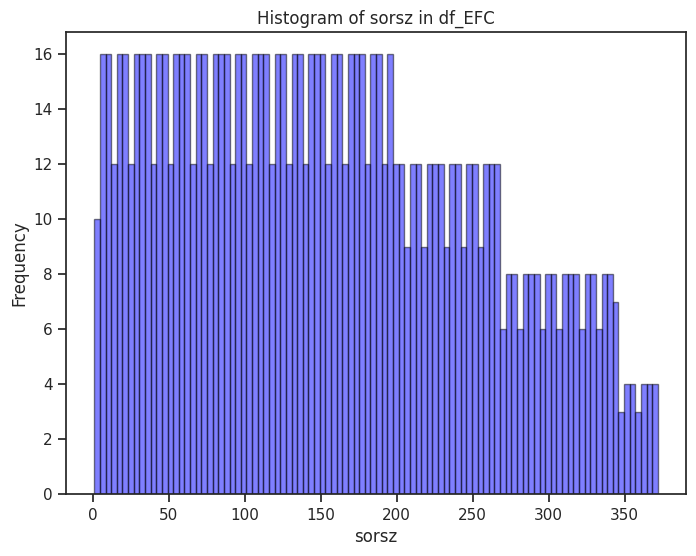

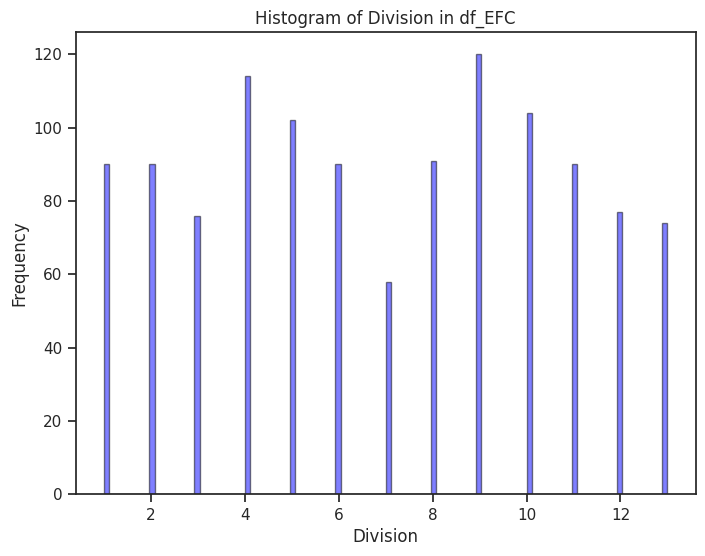

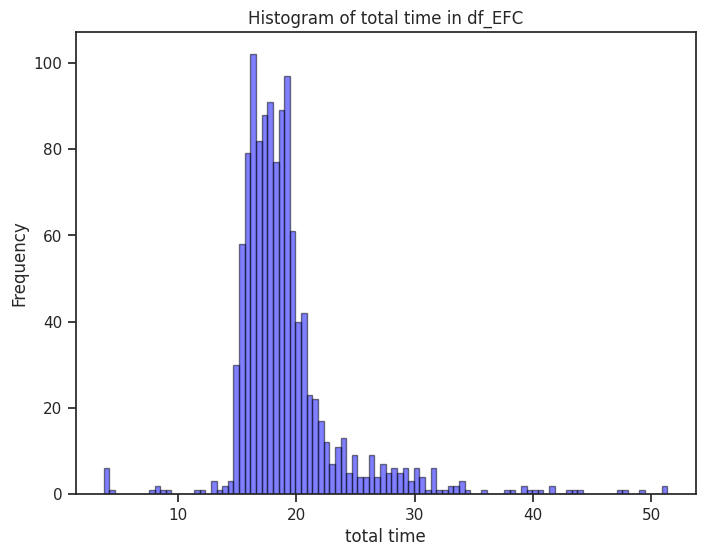

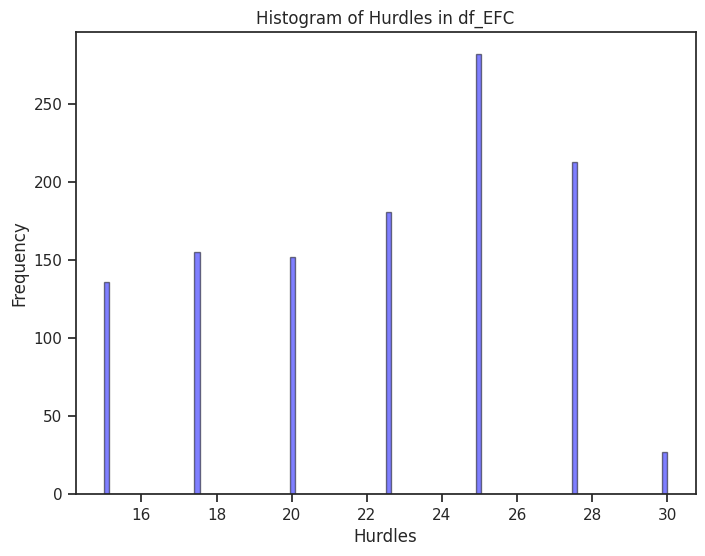

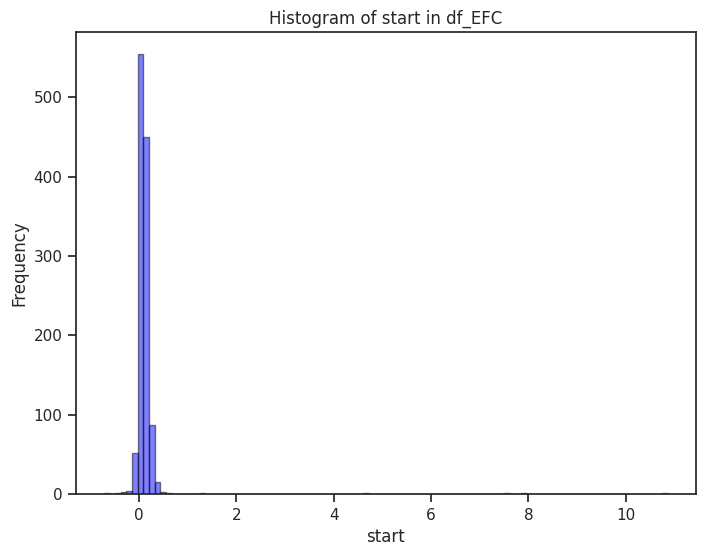

In [27]:
# áttekintő hisztogrammok
"""
240505
Ebben a kódban a plot_histograms függvényt definiáljuk, amely paraméterként várja a DataFrame nevét (dataframe_name).
A függvény megpróbálja betölteni a megadott DataFrame-et, és ha nem találja, hibát kezel.
Az iteráció és hisztogram kirajzolás része ugyanaz maradt. Most példa használatként megadhatod a DataFrame nevét a plot_histograms függvényben.
Ebben a kódban az `x_bin_width` és `y_bin_width` változókat 1%-os értékekre állítottam,
majd ezeket használtam a `bins` paraméterek megfelelő számának kiszámításához mind az X, mind az Y tengelyen.
`bin_width` értéke az adott oszlop MAX-MIN értékeinek megadott %-ától függ
"""

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe_name):
    try:
        # Betöltjük a DataFrame-et a megadott név alapján
        df = globals()[dataframe_name]

        print("ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)")
        df.info()

        # Iteráció az oszlopokon és hisztogramok kirajzolása
        for column in df.columns:
            # Csak numerikus oszlopokat veszünk figyelembe (elhagyjuk a nem numerikusakat)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Számold ki a MAX és MIN értékek különbségének megadott %-át
                bin_width = 0.01 * (df[column].max() - df[column].min())
                # Készíts egyedi ábrát minden oszlophoz
                plt.figure(figsize=(8, 6))

                # Készíts hisztogramot a számolt bin-szélességgel
                plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / bin_width),
                         color='blue', edgecolor='black', alpha=0.5)

                # Ábra címe és tengelyfeliratai
                plt.title(f'Histogram of {column} in {dataframe_name}')
                plt.xlabel(column)
                plt.ylabel('Frequency')

                # Minden egyes oszlop ábrát külön mutasd be
                plt.show()

    except KeyError:
        print(f"Error: DataFrame with name '{dataframe_name}' not found.")

# Példa használat:
"""
240505
Ebben a kódban a plot_histograms függvényt definiáljuk, amely paraméterként várja a DataFrame nevét (dataframe_name).
A függvény megpróbálja betölteni a megadott DataFrame-et, és ha nem találja, hibát kezel.
Az iteráció és hisztogram kirajzolás része ugyanaz maradt. Most példa használatként megadhatod a DataFrame nevét a plot_histograms függvényben.
Ebben a kódban az `x_bin_width` és `y_bin_width` változókat 1%-os értékekre állítottam,
majd ezeket használtam a `bins` paraméterek megfelelő számának kiszámításához mind az X, mind az Y tengelyen.
`bin_width` értéke az adott oszlop MAX-MIN értékeinek megadott %-ától függ
"""

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe_name):
    try:
        # Betöltjük a DataFrame-et a megadott név alapján
        df = globals()[dataframe_name]

        print("ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)")
        df.info()

        # Iteráció az oszlopokon és hisztogramok kirajzolása
        for column in df.columns:
            # Csak numerikus oszlopokat veszünk figyelembe (elhagyjuk a nem numerikusakat)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Számold ki a MAX és MIN értékek különbségének megadott %-át
                bin_width = 0.01 * (df[column].max() - df[column].min())
                # Készíts egyedi ábrát minden oszlophoz
                plt.figure(figsize=(8, 6))

                # Készíts hisztogramot a számolt bin-szélességgel
                plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / bin_width),
                         color='blue', edgecolor='black', alpha=0.5)

                # Ábra címe és tengelyfeliratai
                plt.title(f'Histogram of {column} in {dataframe_name}')
                plt.xlabel(column)
                plt.ylabel('Frequency')

                # Minden egyes oszlop ábrát külön mutasd be
                plt.show()

    except KeyError:
        print(f"Error: DataFrame with name '{dataframe_name}' not found.")

# Példa használat:
plot_histograms("df_EFC")
#print(df_EFC)

In [28]:
# Írás CSV fájlba
csv_output_path = "df_EFC_output.csv"
df_EFC.to_csv(csv_output_path, index=False)

# Ellenőrzés
print(f"DataFrame successfully written to {csv_output_path}.")


DataFrame successfully written to df_EFC_output.csv.


## Innentől már csak visszaellenőrzés

In [29]:
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_EFC_output = pd.read_csv("df_EFC_output.csv")

# Az adatok megjelenítése
li(df_EFC_output)

,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
1,2,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
2,3,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
3,4,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
4,5,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
5,6,13,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.2,5.48,Negro,ok,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sorsz        1176 non-null   int64  
 1   Division     1176 non-null   int64  
 2   when         1176 non-null   object 
 3   who          1176 non-null   object 
 4   with who     1176 non-null   object 
 5   total time   1176 non-null   float64
 6   W/L/T        1166 non-null   object 
 7   Hurdles      1146 non-null   float64
 8   name         1149 non-null   object 
 9   start        1176 non-null   float64
 10  1.dog        1176 non-null   object 
 11  name.1       1141 non-null   object 
 12  chng         1150 non-null   object 
 13  2.dog        1168 non-null   object 
 14  name.2       1146 non-null   object 
 15  chng.1       1149 non-null   object 
 16  3.dog        1166 non-null   object 
 17  name.3       1137 non-null   o

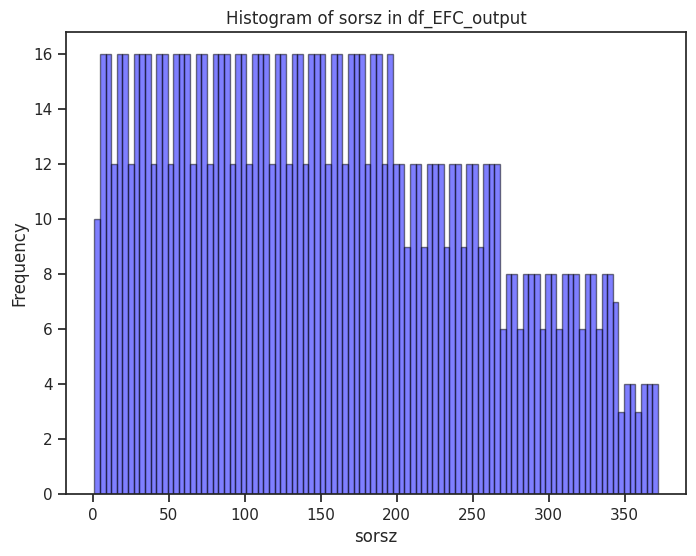

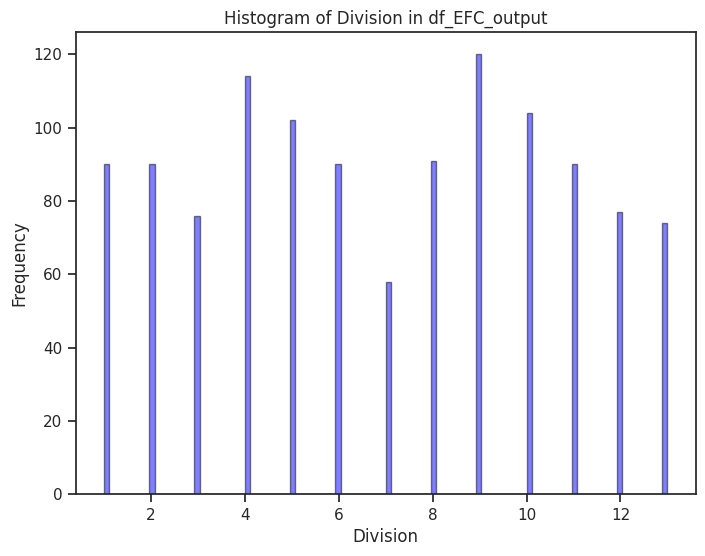

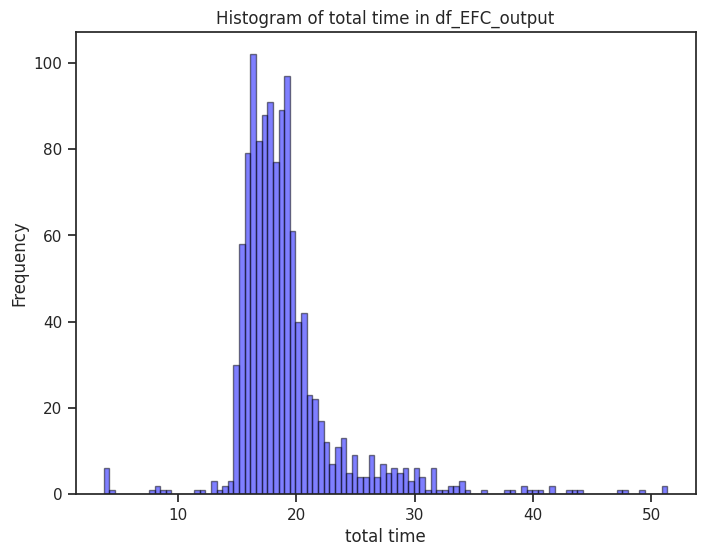

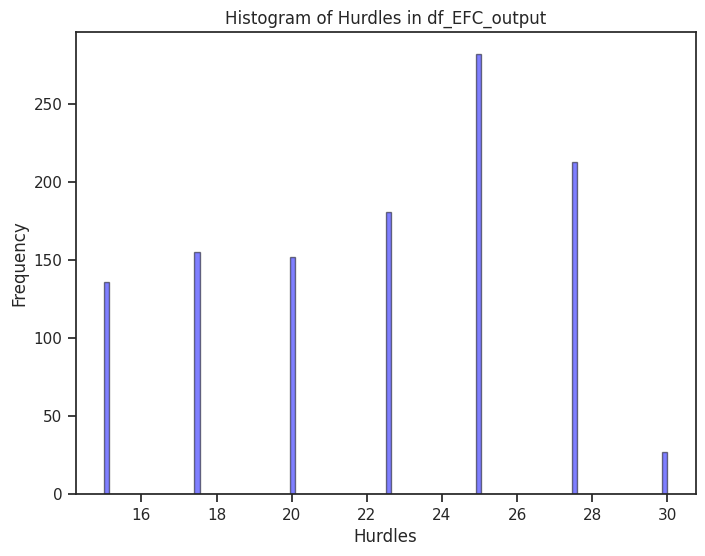

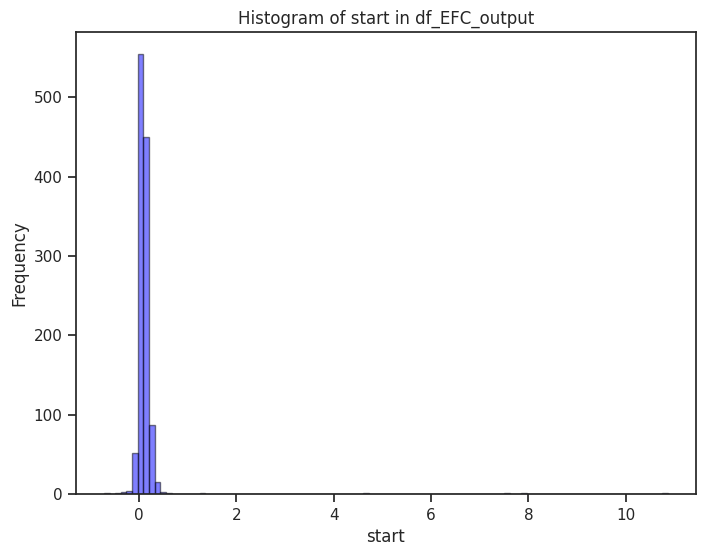

In [30]:
plot_histograms("df_EFC_output")

In [31]:
dinfo(df_EFC_output)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
sorsz,1,int64,1176.0,NaN,NaN,NaN,156.971939,96.841815,1.0,75.75,149.0,231.0,372.0,1,345,0,187,4
Division,2,int64,1176.0,NaN,NaN,NaN,6.916667,3.662093,1.0,4.0,7.0,10.0,13.0,13,5,0,9,120
when,3,object,1176,586,1900-01-01 13:59:14,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 12:26:30,1900-01-01 17:19:09,0,1900-01-01 13:59:14,4
who,4,object,1176,87,RUNAMI A,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Ballance Flyball Team,Akela All in,0,RUNAMI A,25
with who,5,object,1176,87,RUNAMI A,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners Zephyr,JokerZ Sid,0,RUNAMI A,25
total time,6,float64,1176.0,NaN,NaN,NaN,19.215536,4.775336,3.75,16.6175,18.255,19.9525,51.35,21.18,17.33,0,19.25,7
W/L/T,7,object,1166,5,L,485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,W,10,L,485
Hurdles,8,float64,1146.0,NaN,NaN,NaN,22.323298,4.287228,15.0,17.5,22.5,25.0,30.0,15.0,22.5,30,25.0,282
name,9,object,1149,114,Chase,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,Reed,27,Chase,117
start,10,float64,1176.0,NaN,NaN,NaN,0.123605,0.475479,-0.72,0.05,0.09,0.14,10.86,0.33,0.02,0,0.1,91


In [32]:
def list_unique_values(dataframe):
    unique_values = {}
    for column in dataframe.select_dtypes(exclude=['number']).columns:
        unique_values[column] = dataframe[column].value_counts()

    for column, values in unique_values.items():
        # Átmeneti DataFrame létrehozása sorszámozással
        temp_df = pd.DataFrame(values).rename(columns={column: 'Egyedi db'})
        temp_df.index.name = 'Értékek'
        temp_df.reset_index(inplace=True)
        print(f"Egyedi értékek a(z) '{column}' oszlopban:")
        print(temp_df)
        print()

# Függvény meghívása
list_unique_values(df_EFC_output)

Egyedi értékek a(z) 'when' oszlopban:
                 Értékek  count
0    1900-01-01 13:59:14      4
1    1900-01-01 11:23:34      4
2    1900-01-01 15:35:44      4
3    1900-01-01 13:08:00      4
4    1900-01-01 12:26:30      2
5    1900-01-01 15:36:41      2
6    1900-01-01 15:23:45      2
7    1900-01-01 15:27:24      2
8    1900-01-01 15:28:29      2
..                   ...    ...
577  1900-01-01 15:07:17      2
578  1900-01-01 15:08:30      2
579  1900-01-01 15:09:40      2
580  1900-01-01 15:12:48      2
581  1900-01-01 15:14:25      2
582  1900-01-01 14:56:03      1
583  1900-01-01 14:54:50      1
584  1900-01-01 14:54:10      1
585  1900-01-01 10:05:48      1

[586 rows x 2 columns]

Egyedi értékek a(z) 'who' oszlopban:
                       Értékek  count
0                     RUNAMI A     25
1   Real Ballance Flyball Team     23
2        WildRunners Nightfall     23
3                   Quickstep!     23
4                 Free X-treme     22
5                Be Quickstep!  

In [33]:
df_EFC_output.head()

,sorsz,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
1,2,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
2,3,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
3,4,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
4,5,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.


##Folytasd ezzel: Flyball_CZ_cleaning_XXXXXX.ipynb